### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is condition type and the dependent variable is the time the task took.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$h_{0}$: $\mu_{T incongruent} -  \mu_{T congruent} \leq 0$
<br>
$h_{1}$: $\mu_{T incongruent} -  \mu_{T congruent} \gt 0$

$T_{incongruent}$ and $T_{congruent}$ is how much time elapses in the incongruent and congruent cases respectively. Since the words for the congruent case match the colors we would expect the elapse time to be less than the incongruent case. This means the null should be when the incongruent time is shorter than the congruent time or when they are equal.

For this set of hypotheses I propose that a **bootstrapping** statistical test approach is used to get a **sampling distribution** of the difference of means and then the standard deviation from that sampling distribution is used to simulate what the distribution would be underneath the null hypothesis. From there the observed sample statistic can be used to calculate a p-value to see if we can reject the null hypothesis. Also we can visualize the distribution and observed mean via a histogram to better see if the observed mean came from the null distribution.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
# Perform the analysis here
import pandas as pd
stroop_df = pd.read_csv("data/stroopdata.csv")
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean time for congruent and incongruent cases is 14.05 and 22.01 respectively. The Standard Deviation for both cases are 3.559 and 4.797.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

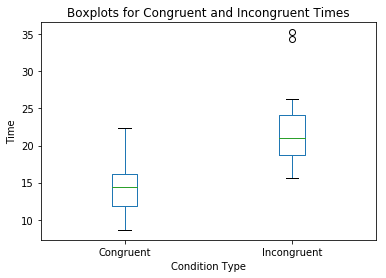

In [20]:
stroop_df.plot(kind='box');
plt.title("Boxplots for Congruent and Incongruent Times")
plt.xlabel("Condition Type");
plt.ylabel("Time");

The elapsed time for congruent tests are on average less than incongruent times. Also there were a couple of outliers with larged elapsed times for the incongruent case.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [55]:
# Perform the statistical test here
import numpy as np

obs_diff_means = stroop_df["Incongruent"].mean() - stroop_df["Congruent"].mean()
diff_means = []

for _ in range(10000):
    bootsample_df = stroop_df.sample(n=stroop_df.shape[0], replace=True)
    diff_means.append(bootsample_df["Incongruent"].mean() - bootsample_df["Congruent"].mean())

diff_means = np.array(diff_means)

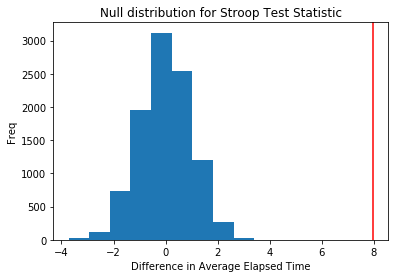

In [64]:
null_dist = np.random.normal(loc=0, scale=diff_means.std(), size=10000)
plt.hist(null_dist);
plt.title("Null distribution for Stroop Test Statistic");
plt.xlabel("Difference in Average Elapsed Time");
plt.ylabel("Freq");
plt.axvline(x=obs_diff_means, color='red');

In [62]:
(null_dist > obs_diff_means).mean()

0.0

The observed statistic in this case is way outside of the expected range of the null distribution (as seen with red line) and has a P-value of zero. This means we can reject the null hypothesis.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--